In [231]:
# Explore the columns of data and find outliers
import pandas as pd
import numpy as np
import os
import datetime
from typing import List, Tuple, Dict, Any, Union, Callable

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from tueplots import bundles
import pandas as pd
import numpy as np

plt.rcParams.update(bundles.beamer_moml())

# Update the font
plt.rcParams["font.family"] = "serif"

# Update the plt savefig path
SAVE_DIR = '../../figures/'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.format'] = 'jpg'
plt.rcParams["savefig.directory"] = SAVE_DIR

# Dataset Loading & Preprocess

This section loads the datasets that will be used for exploration into the RAM.
- `charts_df` is responsible for the rankings of the songs of different days and regions
- `audio_df` is responsible for the audio features, which are fetched by using Spotify API in the `data_preprocess.ipynb` notebook.

In [25]:
REFRESH_DATA = False
CHARTS_PATH = '../../data/charts_processed.csv'
AUDIO_PATH = '../../data/audio_features_processed.csv'


In [27]:
if REFRESH_DATA:

    # Load the datasets into dataframes. Read the date column as datetime.date
    charts_df = pd.read_csv(CHARTS_PATH, parse_dates=['date'])

charts_df['date'] = pd.to_datetime(charts_df['date'])

# Display the first few rows of the DataFrame to verify
charts_df.head()

                         title  rank       date  \
0      Chantaje (feat. Maluma)     1 2017-01-01   
1  Vente Pa' Ca (feat. Maluma)     2 2017-01-01   
2   Reggaetón Lento (Bailemos)     3 2017-01-01   
3                       Safari     4 2017-01-01   
4                  Shaky Shaky     5 2017-01-01   

                                  artist  \
0                                Shakira   
1                           Ricky Martin   
2                                   CNCO   
3  J Balvin, Pharrell Williams, BIA, Sky   
4                           Daddy Yankee   

                                                 url     region   chart  \
0  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  Argentina  top200   
1  https://open.spotify.com/track/7DM4BPaS7uofFul...  Argentina  top200   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  Argentina  top200   
3  https://open.spotify.com/track/6rQSrBHf7HlZjtc...  Argentina  top200   
4  https://open.spotify.com/track/58IL315gMSTD37D... 

In [6]:
if REFRESH_DATA:
    # Load the audio features dataset
    audio_df = pd.read_csv(AUDIO_PATH)

    # Change the column-name of 'id' to 'track_id' to match the charts_df
    audio_df.rename(columns={'id': 'track_id'}, inplace=True)
    print(audio_df.head())


   acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0       0.18700         0.852       195840   0.773          0.000030    8   
1       0.00431         0.663       259196   0.920          0.000017   11   
2       0.40000         0.761       222560   0.838          0.000000    4   
3       0.55100         0.508       205600   0.687          0.000003    0   
4       0.07600         0.899       234320   0.626          0.000000    6   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1590    -2.921     0       0.0776  102.034               4    0.907   
1    0.1010    -4.070     0       0.2260   99.935               4    0.533   
2    0.1760    -3.073     0       0.0502   93.974               4    0.710   
3    0.1260    -4.361     1       0.3260  180.044               4    0.555   
4    0.0631    -4.228     0       0.2920   88.007               4    0.873   

                 track_id  
0  6mICuAdrwEjh6Y6lroV2Kg  
1  7DM4BPaS7

# Data Visualization & Description

In [ ]:
import plotly.express as px

num_of_regional_points = charts_df.groupby('region').count().iloc[:,0]


fig = px.choropleth(num_of_regional_points, 
                    locations=num_of_regional_points.index, 
                    color=num_of_regional_points.values,
                    locationmode='country names',
                    color_continuous_scale='Blues',
                    title="Number of regional points")
fig.show()


# Data Preprocessing
This part is optional and processed data can be used instead.

In [7]:
# For now only restrict the dataset to top200 charts for stream/ranking analysis.
charts_df = charts_df[charts_df["chart"] == "top200"]
charts_df["track_id"] = charts_df["url"].apply(lambda x: x.split("/")[-1])

# Utility Functions
This section imports some important utility functions.

In [13]:
# Set that each time a library is imported, refresh 
%load_ext autoreload
import sys
sys.path.append(os.path.abspath('..'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from utils.charts import get_charts_by_date, get_charts_by_region
%reload_ext autoreload

In [211]:
# Use case of some utility functions
turkey_df = get_charts_by_region(charts_df, 'Turkey', seperete_dict=False)
get_charts_by_date(turkey_df, ('2019-01-01', '2019-12-31'))

,title,rank,date,artist,url,region,chart,trend,streams,track_id
3773532,Aşk Bitsin,44,2019-01-03,Buray,https://open.spotify.com/track/7KwJ77WnVmphcdS...,Turkey,top200,MOVE_DOWN,30777.0,7KwJ77WnVmphcdSDtIHe47
3773966,Bu Gece,45,2019-01-03,Ceg,https://open.spotify.com/track/2DTLzghmLMDNvTY...,Turkey,top200,MOVE_UP,30536.0,2DTLzghmLMDNvTYe67ffuD
3785446,Bir İhtimal Biliyorum,1,2019-01-01,Gülşen,https://open.spotify.com/track/24mpJgP2YZUBif9...,Turkey,top200,SAME_POSITION,108528.0,24mpJgP2YZUBif9NvmYyh4
3785447,3 2 1,2,2019-01-01,Ben Fero,https://open.spotify.com/track/15DPWEQ73JEW3pf...,Turkey,top200,SAME_POSITION,65605.0,15DPWEQ73JEW3pfyU6EcmR
3785448,Sana Doğru,3,2019-01-01,Bora Duran,https://open.spotify.com/track/79sYvkdnJGFrYx6...,Turkey,top200,SAME_POSITION,63799.0,79sYvkdnJGFrYx67nBL5Nk
...,...,...,...,...,...,...,...,...,...,...
10855423,Olmasada Olur,196,2019-12-31,No.1,https://open.spotify.com/track/6L1zNBkpGdYlNof...,Turkey,top200,NEW_ENTRY,23209.0,6L1zNBkpGdYlNofoca1KmH
10855424,Dünya'dan Atlas'a,197,2019-12-31,Şehinşah,https://open.spotify.com/track/0ewiq9snqyF3dUL...,Turkey,top200,MOVE_DOWN,23195.0,0ewiq9snqyF3dULzbMqI3J
10855425,Sana Doğru,198,2019-12-31,Bora Duran,https://open.spotify.com/track/79sYvkdnJGFrYx6...,Turkey,top200,NEW_ENTRY,23135.0,79sYvkdnJGFrYx67nBL5Nk
10855426,Beyaz,199,2019-12-31,Emir Can İğrek,https://open.spotify.com/track/0HIlnKQV5DYXQL9...,Turkey,top200,MOVE_DOWN,23120.0,0HIlnKQV5DYXQL9Edh90mE


## Popularity Analysis
Define the popularity with two metrics $k$ and $\Delta t$. For a date boundary $[a,a + \Delta]$, popularity of a track is given as 
$$ p(k,t) = w\sum_{i = a}^{b}\mathbb 1[r(a) < k]$$
where $r(a)$ is the ranking of the track at the date $a$, and $w$ is the optional weight. 
- For a smaller $k$, higher popularity would mean better rankings so only the most popular songs will have a higher popularity value
- For a higher $k$, higher popularity would be achieved with most of the songs. Popularities will be less sparsed

Altough this ranking tracks how many days a track spent in the charts, their ranking should also be effective at the weights. To do this, one can create a weighting for each `track_id` to control the other parameters of a song.



In [193]:
# For now, we only focus on a specific region
TEST_REGION = 'United States'

In [212]:
from utils.regions import calculate_popularity_metrics

test_df = calculate_popularity_metrics(
    charts_df,
    TEST_REGION,
    ('2019-01-01', '2019-12-31'),
    delta_k = 25
)

Calculating metrics for United States: 100%|██████████| 2066/2066 [00:09<00:00, 222.50it/s]


Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend',
       'streams', 'track_id', 'stream_proportion', 'popularity',
       'average_stream_proportion', 'weighted_popularity'],
      dtype='object')


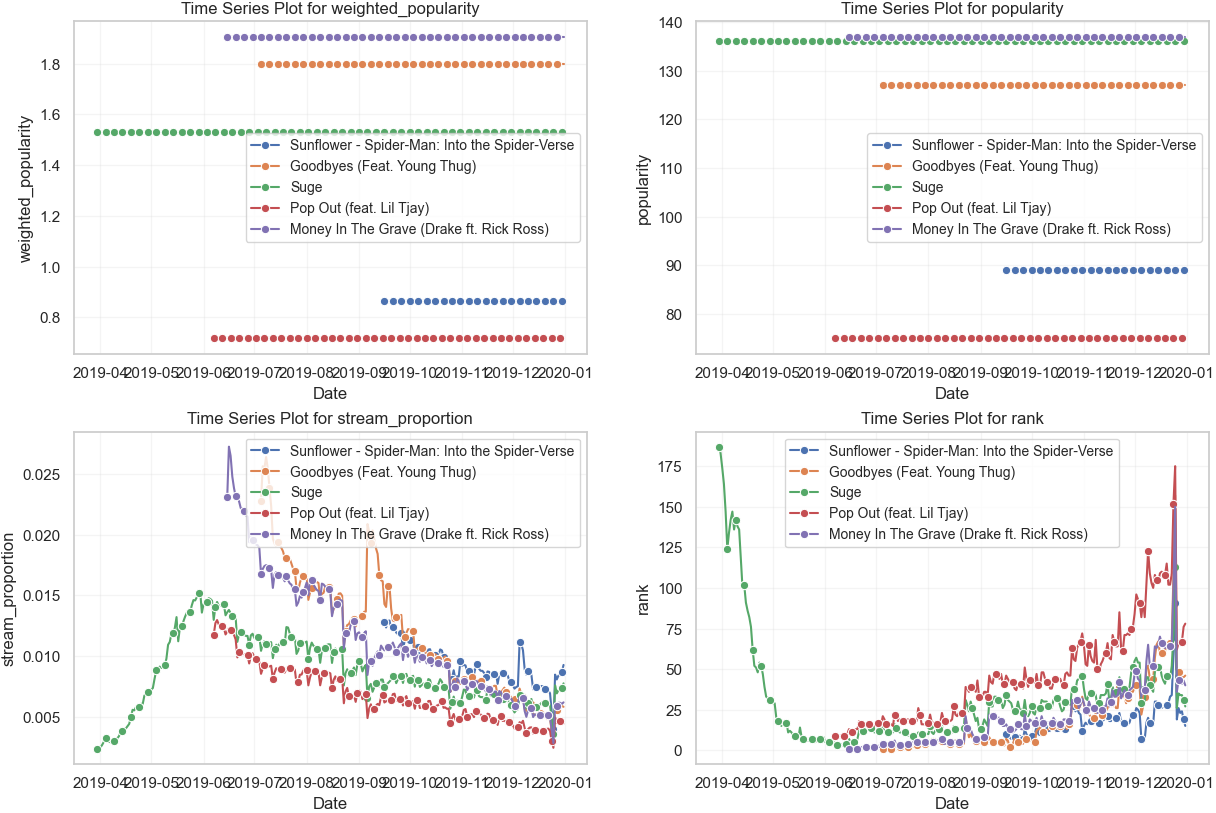

In [214]:
# Get the most popular songs
import matplotlib.pyplot as plt
from utils.visualization import plot_multiple_tracks_time_series,save_current_plot
from utils.tracks import get_track_artist,get_track_title

# Use stream_proportion_average[track_id] *  popularity[track_id] to create a weighted popularity score
test_df['weighted_popularity'] = test_df['popularity'] * test_df['average_stream_proportion']
popularities_sorted = test_df.sort_values('weighted_popularity', ascending=False).set_index('track_id')['weighted_popularity'].to_dict()
popular_track_ids = np.random.choice(list(popularities_sorted.keys())[:50], 5, replace=False)
popular_tracks_df = []
popular_track_labels = []
for track_id in popular_track_ids:
    track_df = test_df[test_df['track_id'] == track_id]
    popular_tracks_df.append(track_df)
    popular_track_labels.append(f"{get_track_title(track_df,track_id)}")

print(test_df.columns)

y_columns = ['weighted_popularity','popularity','stream_proportion','rank']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each column and create a plot
for i, y_col in enumerate(y_columns):
    plot_multiple_tracks_time_series(
        popular_tracks_df,
        "date",
        y_col,
        title=f'Time Series Plot for {y_col}',
        labels = popular_track_labels,
        xlabel='Date',
        ylabel=y_col,
        ax=axs[i],
        marker_every=5  # Show a marker every 5 points
    )

save_current_plot(f"time_series_plot_{TEST_REGION}_delta_{delta_k}.png")


# Make the legends smaller
for ax in axs:
    ax.legend(fontsize='small')
plt.tight_layout()
plt.show()



In [238]:
# Plot the heatmap of the popularity scores with respect to audio features
AUDIO_FEATURES = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Join the audio features the weighted_popularity and popularity scores
# audio_df_with_popularity = audio_df.join(test_df[['track_id','weighted_popularity','popularity']].drop_duplicates(subset="track_id"), on='track_id')

country_list = ["United States", "Turkey", "Germany", "Japan"]
k_range = [5,10,25,50,100,200]
corr_dict = {}
for country in country_list:
    corr_list = []
    for k in k_range:
        test_df = calculate_popularity_metrics(
            charts_df,
            country,
            ('2018-01-01', '2019-12-31'),
            delta_k = k
        )
        test_df['weighted_popularity'] = test_df['popularity'] * test_df['average_stream_proportion']
        corr = test_df[['track_id','weighted_popularity']].join(audio_df.set_index('track_id'), on='track_id').drop_duplicates(subset="track_id").corr()
        corr_list.append(corr)
    corr_dict[country] = corr_list


Calculating metrics for Japan: 100%|██████████| 2379/2379 [00:19<00:00, 119.14it/s]


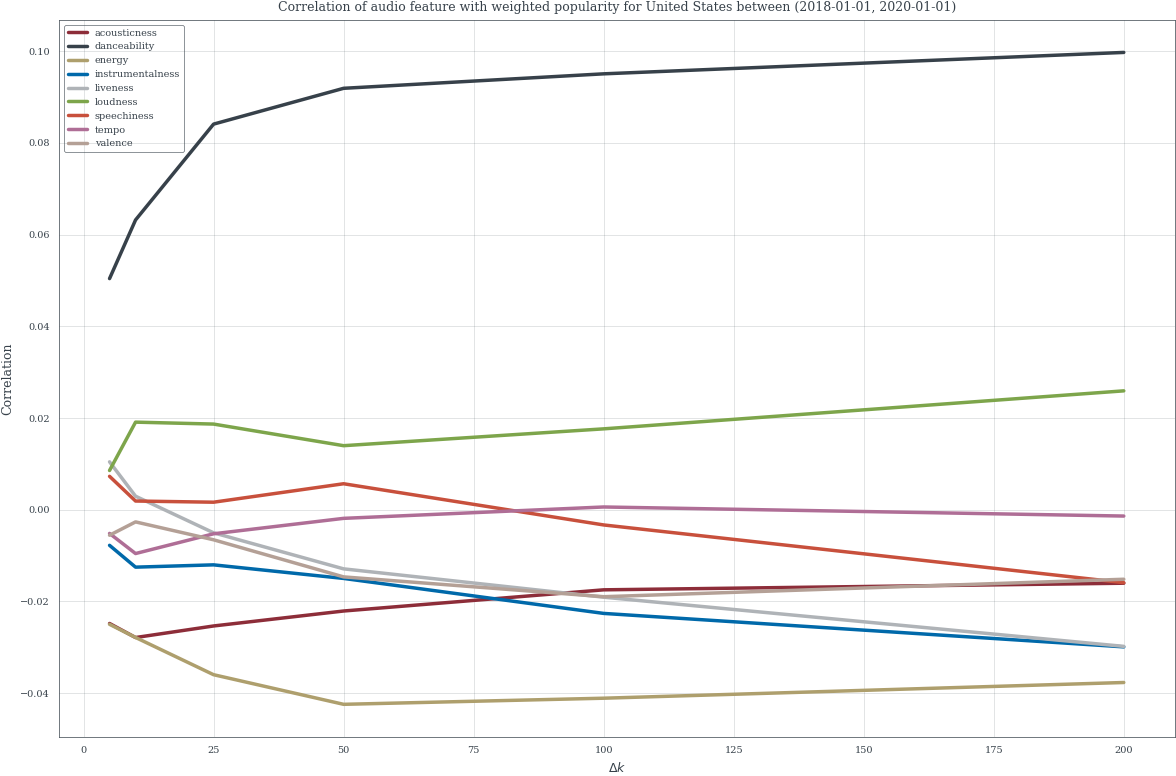

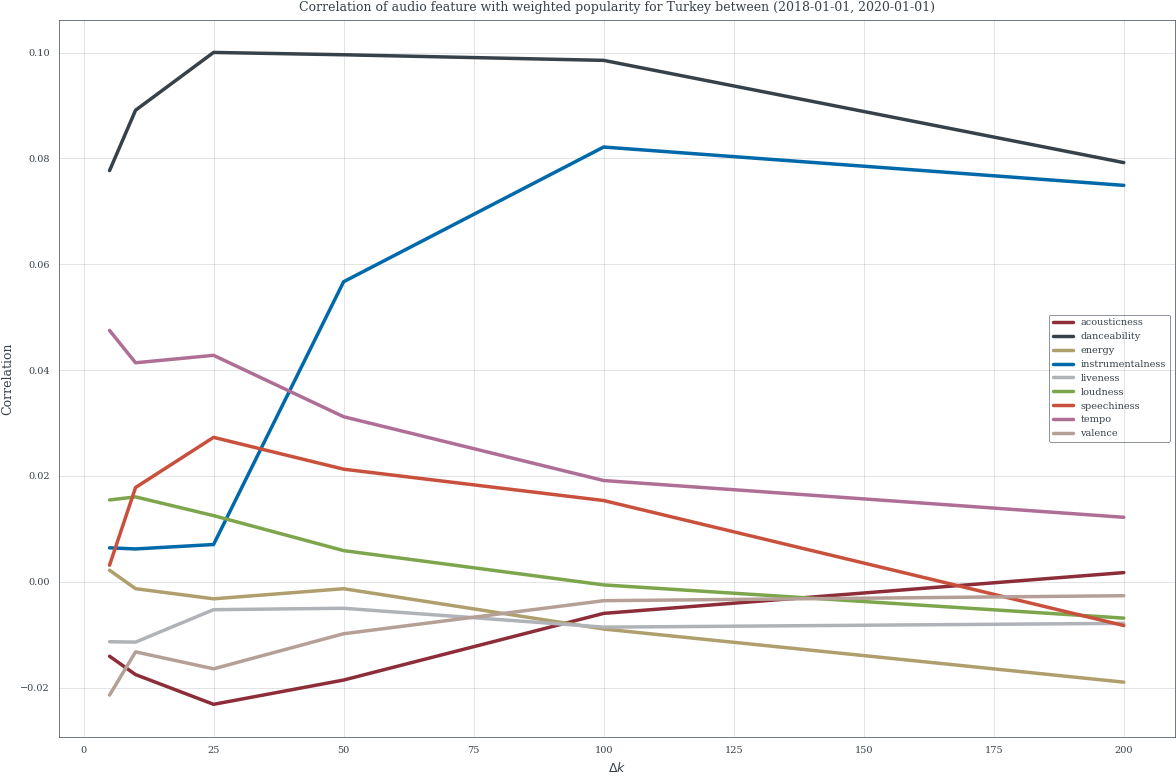

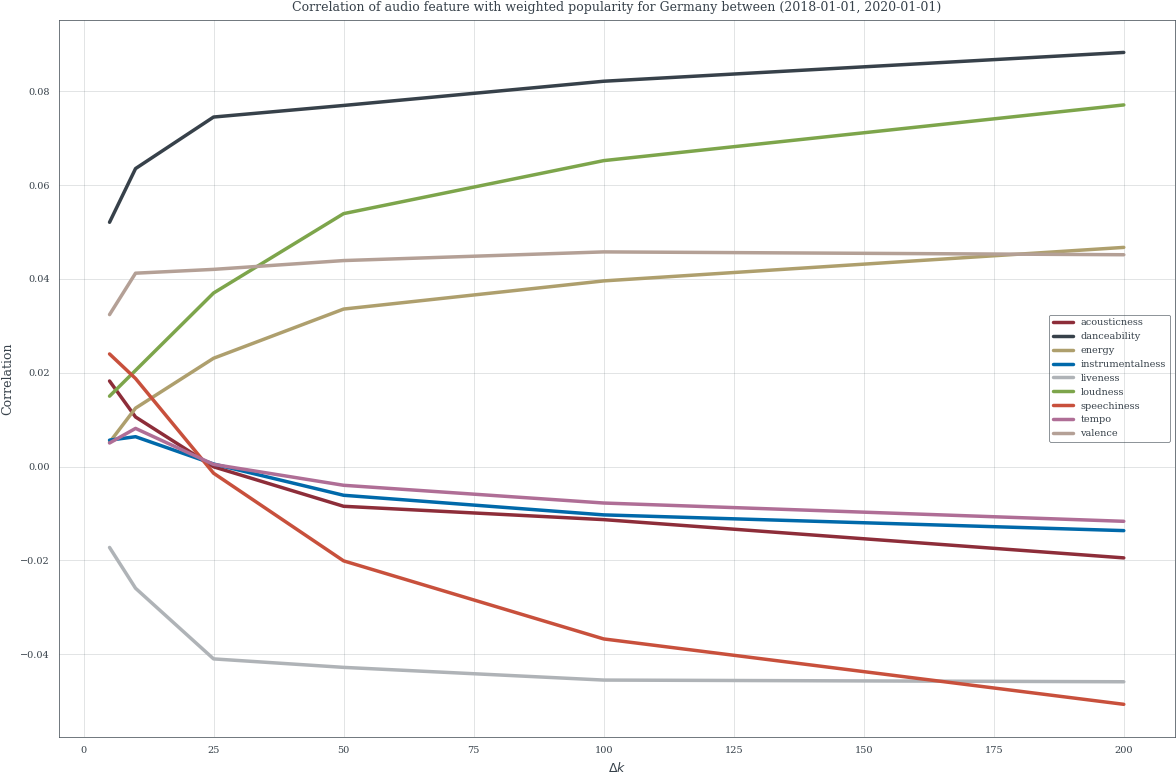

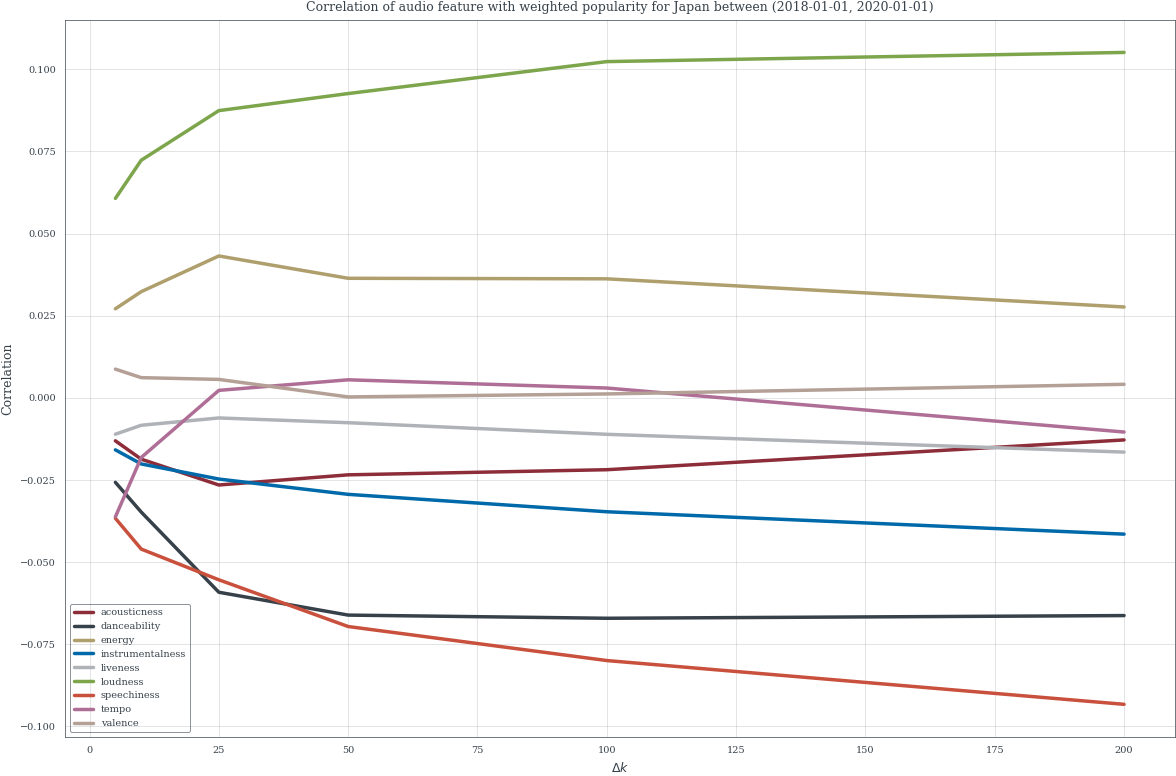

In [251]:
# For every plot, create a 2x2 grid of subplots

# Loop through each country and create a plot
for i, country in enumerate(country_list):
    plt.figure(figsize=(12, 8))
    for audio_feature in AUDIO_FEATURES:
        plt.plot(k_range, [corr_dict[country][j][audio_feature]['weighted_popularity'] for j in range(len(k_range))], label=audio_feature,
                 linewidth=2.5)

    plt.title(f'Correlation of audio feature with weighted popularity for {country} between (2018-01-01, 2020-01-01)')
    plt.xlabel('$ \Delta k$')
    plt.ylabel('Correlation')
    plt.tight_layout()
    plt.legend()
    plt.savefig(os.path.join("/Users/kbora/Documents/Spoti-Youtube/data-literacy-project/DataLiteracy-MusicAnalysis/figures/correlation_plots",f'popularitycorrelation_{country}.png'))